In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

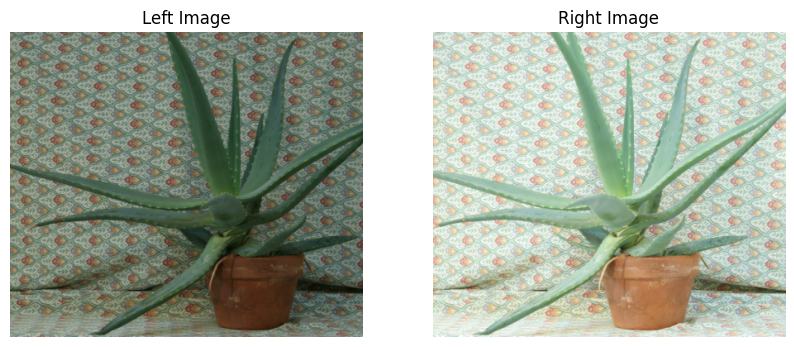

In [2]:
left_img_path = "data/aloe/aloe_left_1.png"
right_img_path = "data/aloe/aloe_right_2.png"
disparity_range = 64
kernel_size = 3

left = cv2.imread(left_img_path)
right = cv2.imread(right_img_path)


def plot_images(left, right):
    # convert to RGB
    left = cv2.cvtColor(left, cv2.COLOR_BGR2RGB)
    right = cv2.cvtColor(right, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(left)
    ax[0].set_title("Left Image")
    ax[0].axis("off")
    ax[1].imshow(right)
    ax[1].set_title("Right Image")
    ax[1].axis("off")
    plt.show()


plot_images(left, right)

In [3]:
def l1_distance(x, y):
    return abs(x - y)


def window_based_matching_l1(
    left_img, right_img, disparity_range, kernel_size=5, save_result=True
):
    # Read left, right images then convert to grayscale
    left = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)

    kernel_half = int((kernel_size - 1) / 2)
    scale = 3
    max_value = 255 * 9

    for y in range(kernel_half, height - kernel_half):
        for x in range(kernel_half, width - kernel_half):
            # Find j where cost has minimum value
            disparity = 0
            cost_min = 65534

            for j in range(disparity_range):
                total = 0
                value = 0

                for v in range(-kernel_half, kernel_half + 1):
                    for u in range(-kernel_half, kernel_half + 1):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = l1_distance(
                                int(left[y + v, x + u]), int(right[y + v, (x + u) - j])
                            )
                        total += value

                if total < cost_min:
                    cost_min = total
                    disparity = j

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result == True:
        print("Saving result...")
        # Save results
        cv2.imwrite(f"outputs/window_based_l1.png", depth)
        cv2.imwrite(
            f"outputs/window_based_l1_color.png",
            cv2.applyColorMap(depth, cv2.COLORMAP_JET),
        )

    print("Done.")

    return depth, cv2.applyColorMap(depth, cv2.COLORMAP_JET)

Saving result...
Done.


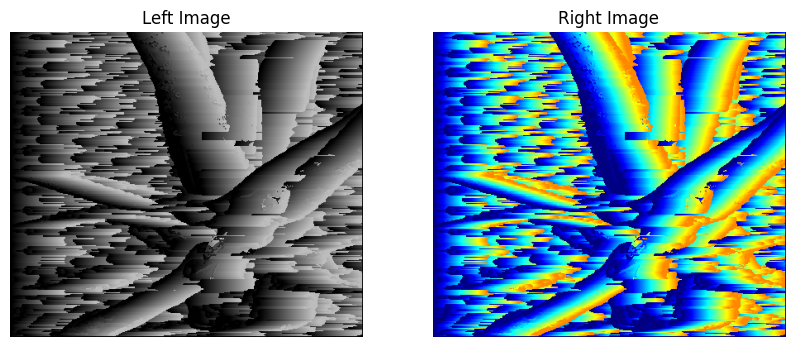

In [4]:
# L1 Result
depth, color = window_based_matching_l1(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result=True,
)

plot_images(depth, color)

In [5]:
def l2_distance(x, y):
    return (x - y) ** 2


def window_based_matching_l2(
    left_img, right_img, disparity_range, kernel_size=5, save_result=True
):
    # Read left, right images then convert to grayscale
    left = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)

    kernel_half = int((kernel_size - 1) / 2)
    scale = 3
    max_value = 255**2

    for y in range(kernel_half, height - kernel_half):
        for x in range(kernel_half, width - kernel_half):

            # Find j where cost has minimum value
            disparity = 0
            cost_min = 65534

            for j in range(disparity_range):
                total = 0
                value = 0

                for v in range(-kernel_half, kernel_half + 1):
                    for u in range(-kernel_half, kernel_half + 1):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = l2_distance(
                                int(left[y + v, x + u]), int(right[y + v, (x + u) - j])
                            )
                        total += value

                if total < cost_min:
                    cost_min = total
                    disparity = j

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result == True:
        print("Saving result...")
        # Save results
        cv2.imwrite(f"outputs/window_based_l2.png", depth)
        cv2.imwrite(
            f"outputs/window_based_l2_color.png",
            cv2.applyColorMap(depth, cv2.COLORMAP_JET),
        )

    print("Done.")

    return depth, cv2.applyColorMap(depth, cv2.COLORMAP_JET)

Saving result...
Done.


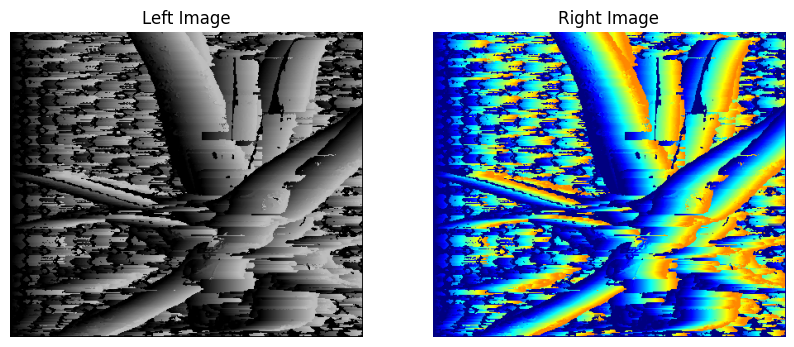

In [6]:
# L2 Result
depth, color = window_based_matching_l2(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result=True,
)

plot_images(depth, color)